Similar to Mayo+2018, we computed `secthresh` by binning the phase-folded lightcurves by measuring the transit duration and taking thrice the value of the standard deviation of the mean in each bin. Effectively, we are asserting that we did not detect a secondary eclipse at any phase (not only at phase=0.5) at 3-$\sigma$ level.

In [1]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

In [1]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


## Initialize light curve

In [2]:
toiid = 1696
s=cr.ShortCadence(toiid=toiid)
s

Target: TOI 1696
Available sectors: [19]
Using sector=19.
Searching lightcurvefile for TIC 470381900 (sector 19).
Found 1 lightcurve(s).
Using TESS short cadence.



ShortCadence(mission=tess, toiid=1696, ticid=470381900, target_coord=(65.2807,48.8198), all_sectors=[19], search_radius=3.0 arcsec, sap_mask=pipeline, quality_bitmask=default, calc_fpp=False)

## SAP

In [3]:
#download PDCSAP lc
sap = s.get_lc(lctype='sap')

sap = sap.remove_outliers(sigma_upper=5)

Duration should be in hours.
Using period=2.5007 d, epoch=1816.70 BTJD, duration=0.98 hr.
Duration should be in hours.
Using biweight filter with window_length=0.50 day.


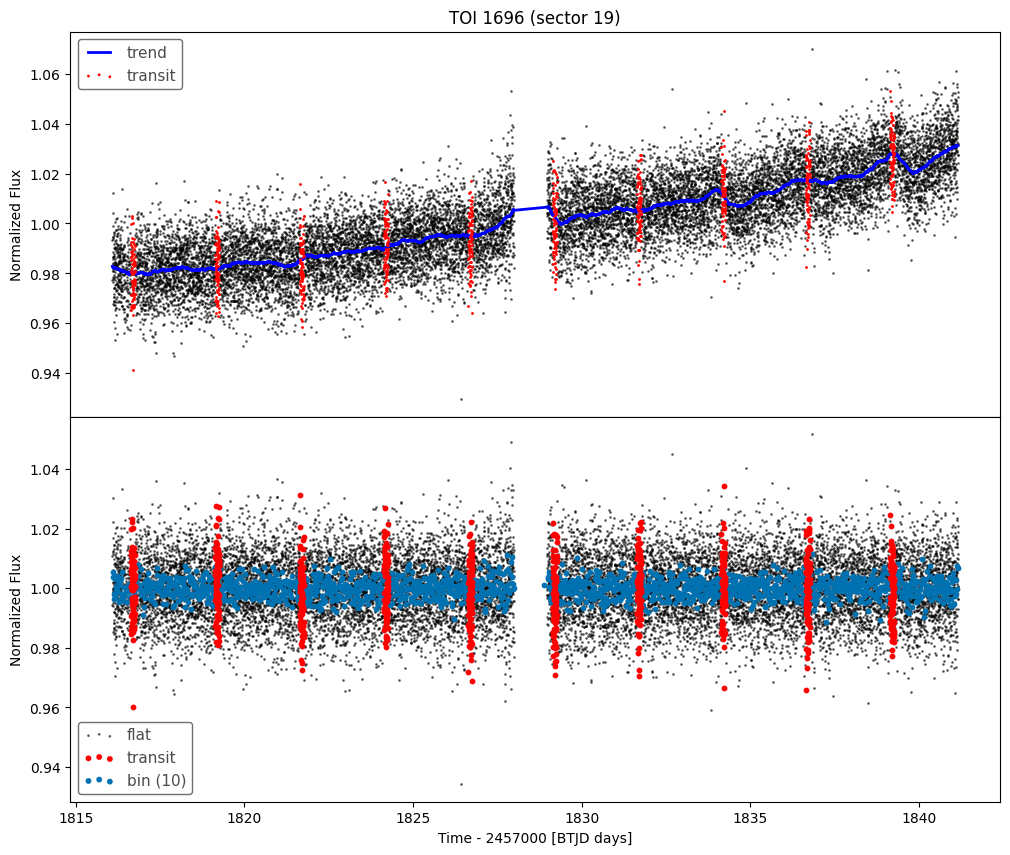

In [4]:
#plot raw, trend and flattened lc
#transits are automatically masked if TOI ephemeris is known
fig = s.plot_trend_flat_lcs(sap, window_length=0.5)

Duration should be in hours.
Using biweight filter with window_length=0.50 day.


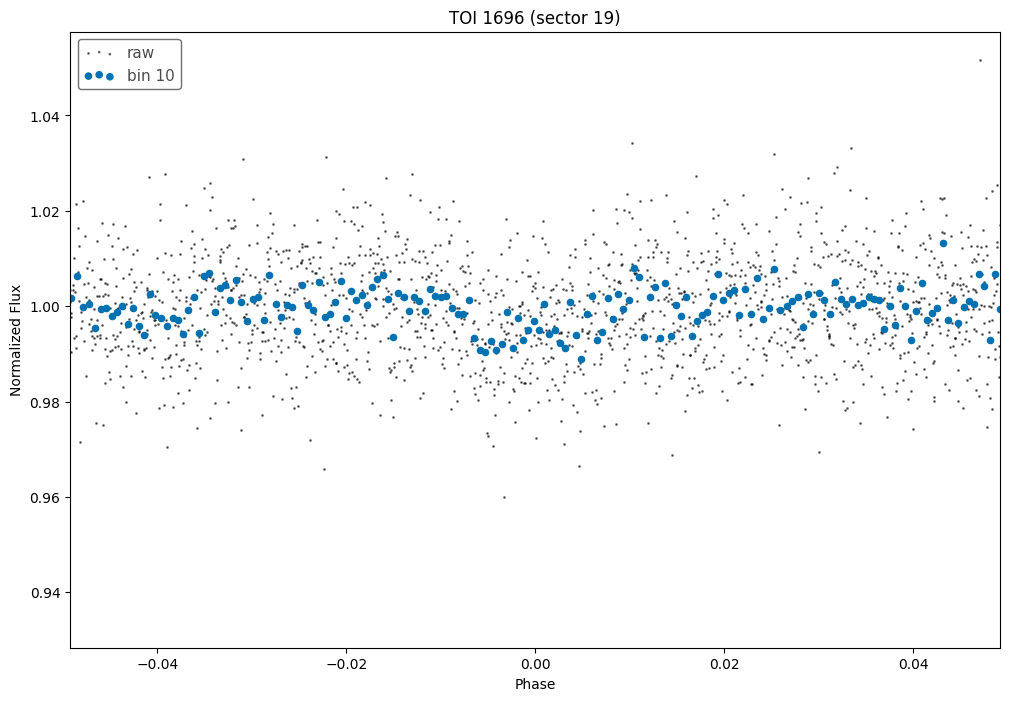

In [5]:
flat = s.get_flat_lc(sap, window_length=0.5)

#plot folded lc
ax = s.plot_fold_lc(flat)

In [48]:
per = s.toi_period
t0 = s.toi_epoch-cr.TESS_TIME_OFFSET
t14 = s.toi_duration
depth = s.toi_depth

Duration should be in hours.
Using biweight filter with window_length=0.50 day.


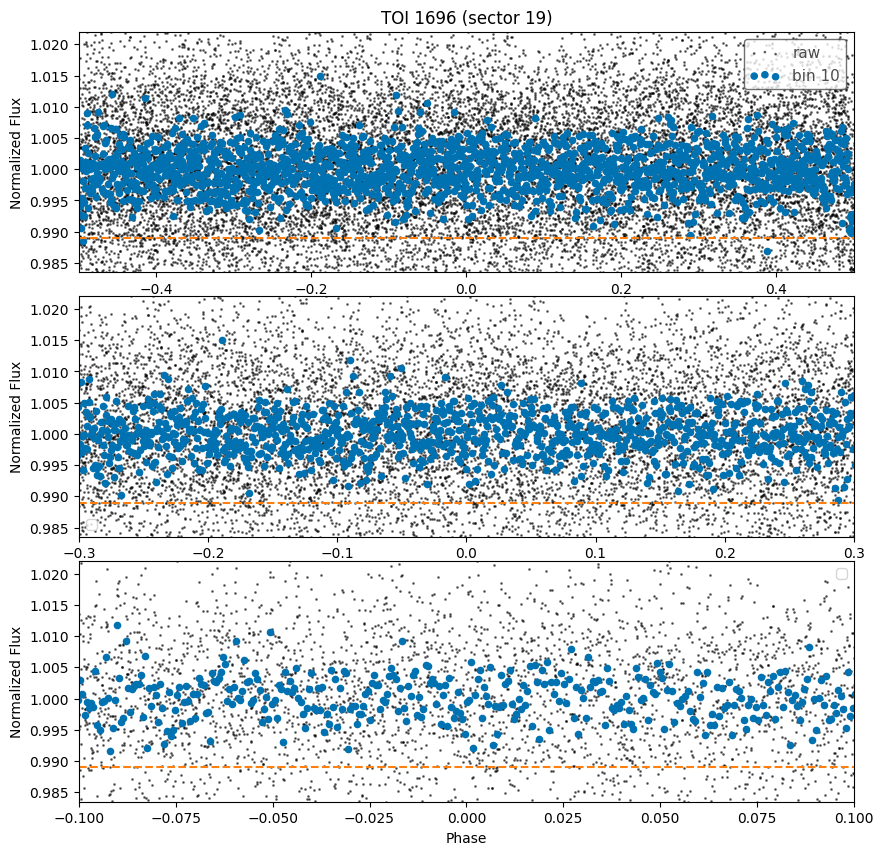

In [49]:
import matplotlib.pyplot as pl

#flatten lc
flat = s.get_flat_lc(sap, window_length=0.5)

fig, axs = pl.subplots(3,1, figsize=(10,10), gridspec_kw={'hspace': 0.1})
dy = 5 if depth<0.01 else 1.5
ylim=(1-dy*depth, 1+2*depth)

_ = s.plot_fold_lc(flat, period=per, epoch=t0+per/2, ax=axs[0])
axs[0].axhline(1-depth, 0, 1, c='C1', ls='--')
pl.setp(axs[0], xlim=(-0.5, 0.5), ylim=ylim)

_ = s.plot_fold_lc(flat, period=per, epoch=t0+per/2, ax=axs[1])
axs[1].axhline(1-depth, 0, 1, c='C1', ls='--')
axs[1].legend('')
pl.setp(axs[1], xlim=(-0.3, 0.3), title='', ylim=ylim)

_ = s.plot_fold_lc(flat, period=per, epoch=t0+per/2, ax=axs[2])
axs[2].axhline(1-depth, 0, 1, c='C1', ls='--')
axs[2].legend('')
pl.setp(axs[2], xlim=(-0.1, 0.1), title='', ylim=ylim);

<AxesSubplot:xlabel='Phase', ylabel='Normalized Flux'>

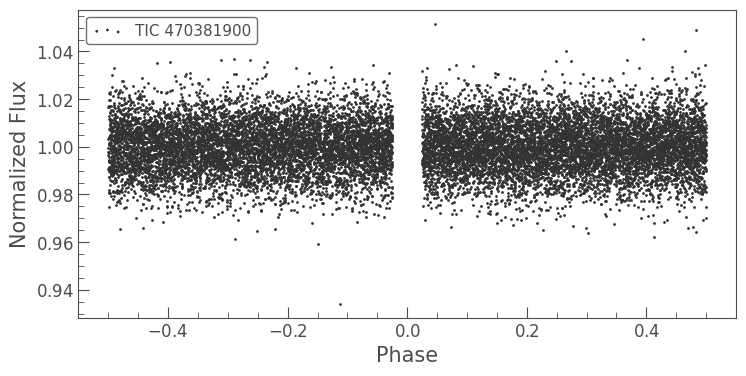

In [50]:
tmask = cr.get_transit_mask(flat, period=per, epoch=t0, duration_hours=s.toi_duration)
fold = flat[~tmask].fold(period=per, t0=t0)
fold.scatter()

<AxesSubplot:title={'center':'Target ID: 470381900, Cadence: 423813'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

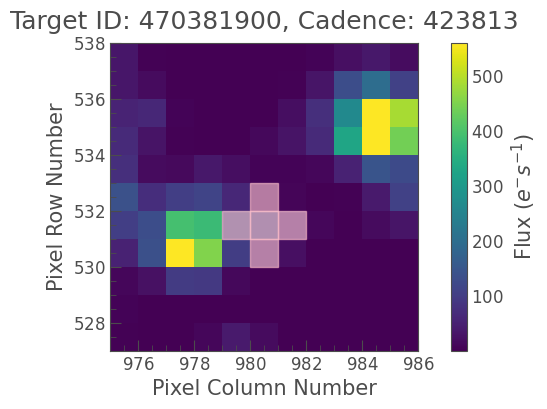

In [54]:
tpf = s.get_tpf()
tpf.plot(aperture_mask='pipeline')

In [55]:
import numpy as np

r = np.hypot(tpf.pipeline_mask.max(axis=0).sum(), tpf.pipeline_mask.max(axis=1).sum())/2
aper_rad = cr.TESS_pix_scale*r
aper_rad

<Quantity 44.54772721 arcsec>

Calculate the threshold for secondary eclipse

In [52]:
import numpy as np

means = []
chunks = np.arange(-0.5, 0.51, t14/24/per, )
for n,x in enumerate(chunks):
    if n==0:
        x1 = -0.5
        x2 = x
    elif n==len(chunks):
        x1 = x
        x2 = 0.5
    else:
        x1 = chunks[n-1]
        x2 = x
    idx = (fold.phase>x1) & (fold.phase<x2)
    mean = np.nanmean(fold.flux[idx])
    print(mean)
    means.append(mean)


3*np.nanstd(means)

nan
1.000043715750626
1.0012859798978635
1.0002175311784327
0.9997777897616462
0.9996673942268496
0.9994090405435724
0.9997186722914363
1.000481177838066
0.9992548265166377
1.0005182064333826
0.9997091018411671
0.999669053765047
0.9996382610822305
1.0006196581050555
0.9996163274580018
1.000672914439807
1.0002504122751066
0.9990633423415479
1.0001637768977756
1.0003629340514222
1.0004967784755034
0.9989614752344341
1.0006906187502125
0.9990542297638779
1.0000523119940778
1.000785626529374
1.000488417670961
0.9992876543706127
1.0002584230263987
nan
nan
1.0004371345623437
1.0004761917651768
1.0007002898952897
0.9992222576638068
1.0000323617379046
1.0001305152600803
0.999805736464615
1.0009089272582556
1.0003802191590345
0.999865167993392
0.9990533385804062
0.9993931434770993
0.9997982638049486
0.9992600788181565
0.9996981256314649
1.0008752647946235
1.00039003571142
0.9997886376303061
1.0003275810059449
0.9992134674205224
1.0007767235883853
0.9999568397106735
0.9987724395305426
1.00000992

0.0018488051952163108